In [1]:
import scanpy as sc
import scarches as sca
import numpy as np

In [2]:
sc.set_figure_params(figsize=(4, 4))

### Pbmc Kang

In [3]:
adata = sc.read('kang_pbmc_integrated_le.h5ad')

In [4]:
adata.obs['condition_merged'] = adata.obs['condition'].tolist()
adata.obs['condition_merged'][adata.obs['condition_merged'].astype(str)=='nan'] = 'control'
adata.strings_to_categoricals()

<ipython-input-4-dcc145970c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['condition_merged'][adata.obs['condition_merged'].astype(str)=='nan'] = 'control'
... storing 'condition_merged' as categorical


In [5]:
intr_cvae = sca.models.TRVAE.load('q_intr_cvae_nolog_le_alpha_kl_0_5_0_001_sd_2020', adata)


INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1972 256 5
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 282
Encoder Architecture:
	Input Layer in, out and cond: 1972 128 5
	Mean/Var Layer in/out: 128 1
Decoder Architecture:
	Masked linear layer in, out and cond:  282 1972 5


In [6]:
directions = intr_cvae._latent_directions(method="sum")

In [7]:
adata.obsm['X_cvae'] *= directions[intr_cvae.model.decoder.nonzero_terms()]

In [8]:
scores_cond = intr_cvae.latent_enrich('condition_merged', comparison="control", directions=directions, adata=adata)

In [9]:
scores_ct = intr_cvae.latent_enrich('cell_type_joint', directions=directions, n_perm=7000, adata=adata)

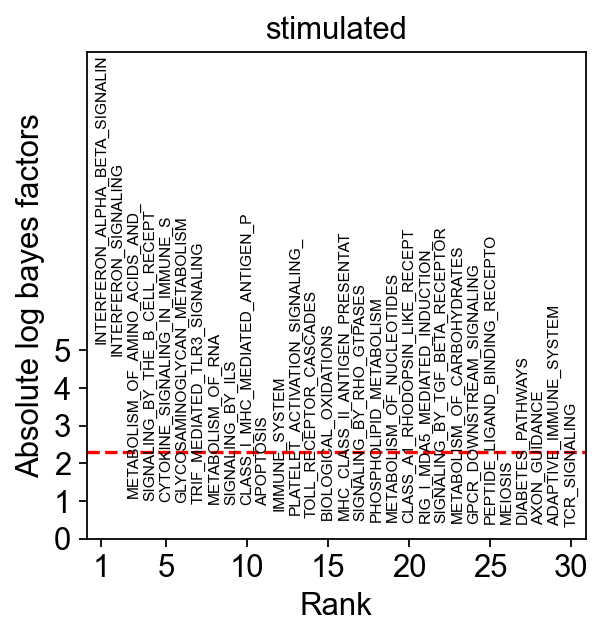

In [10]:
# plot one key
fig = sca.plotting.plot_abs_bfs(scores_cond, adata.uns['terms'], keys='stimulated', yt_step=1, fontsize=7, scale_y=2.5)

In [ ]:
# plot all keys
fig = sca.plotting.plot_abs_bfs(scores_ct, adata.uns['terms'], n_cols=5)

In [12]:
fig.set_size_inches(26, 26)

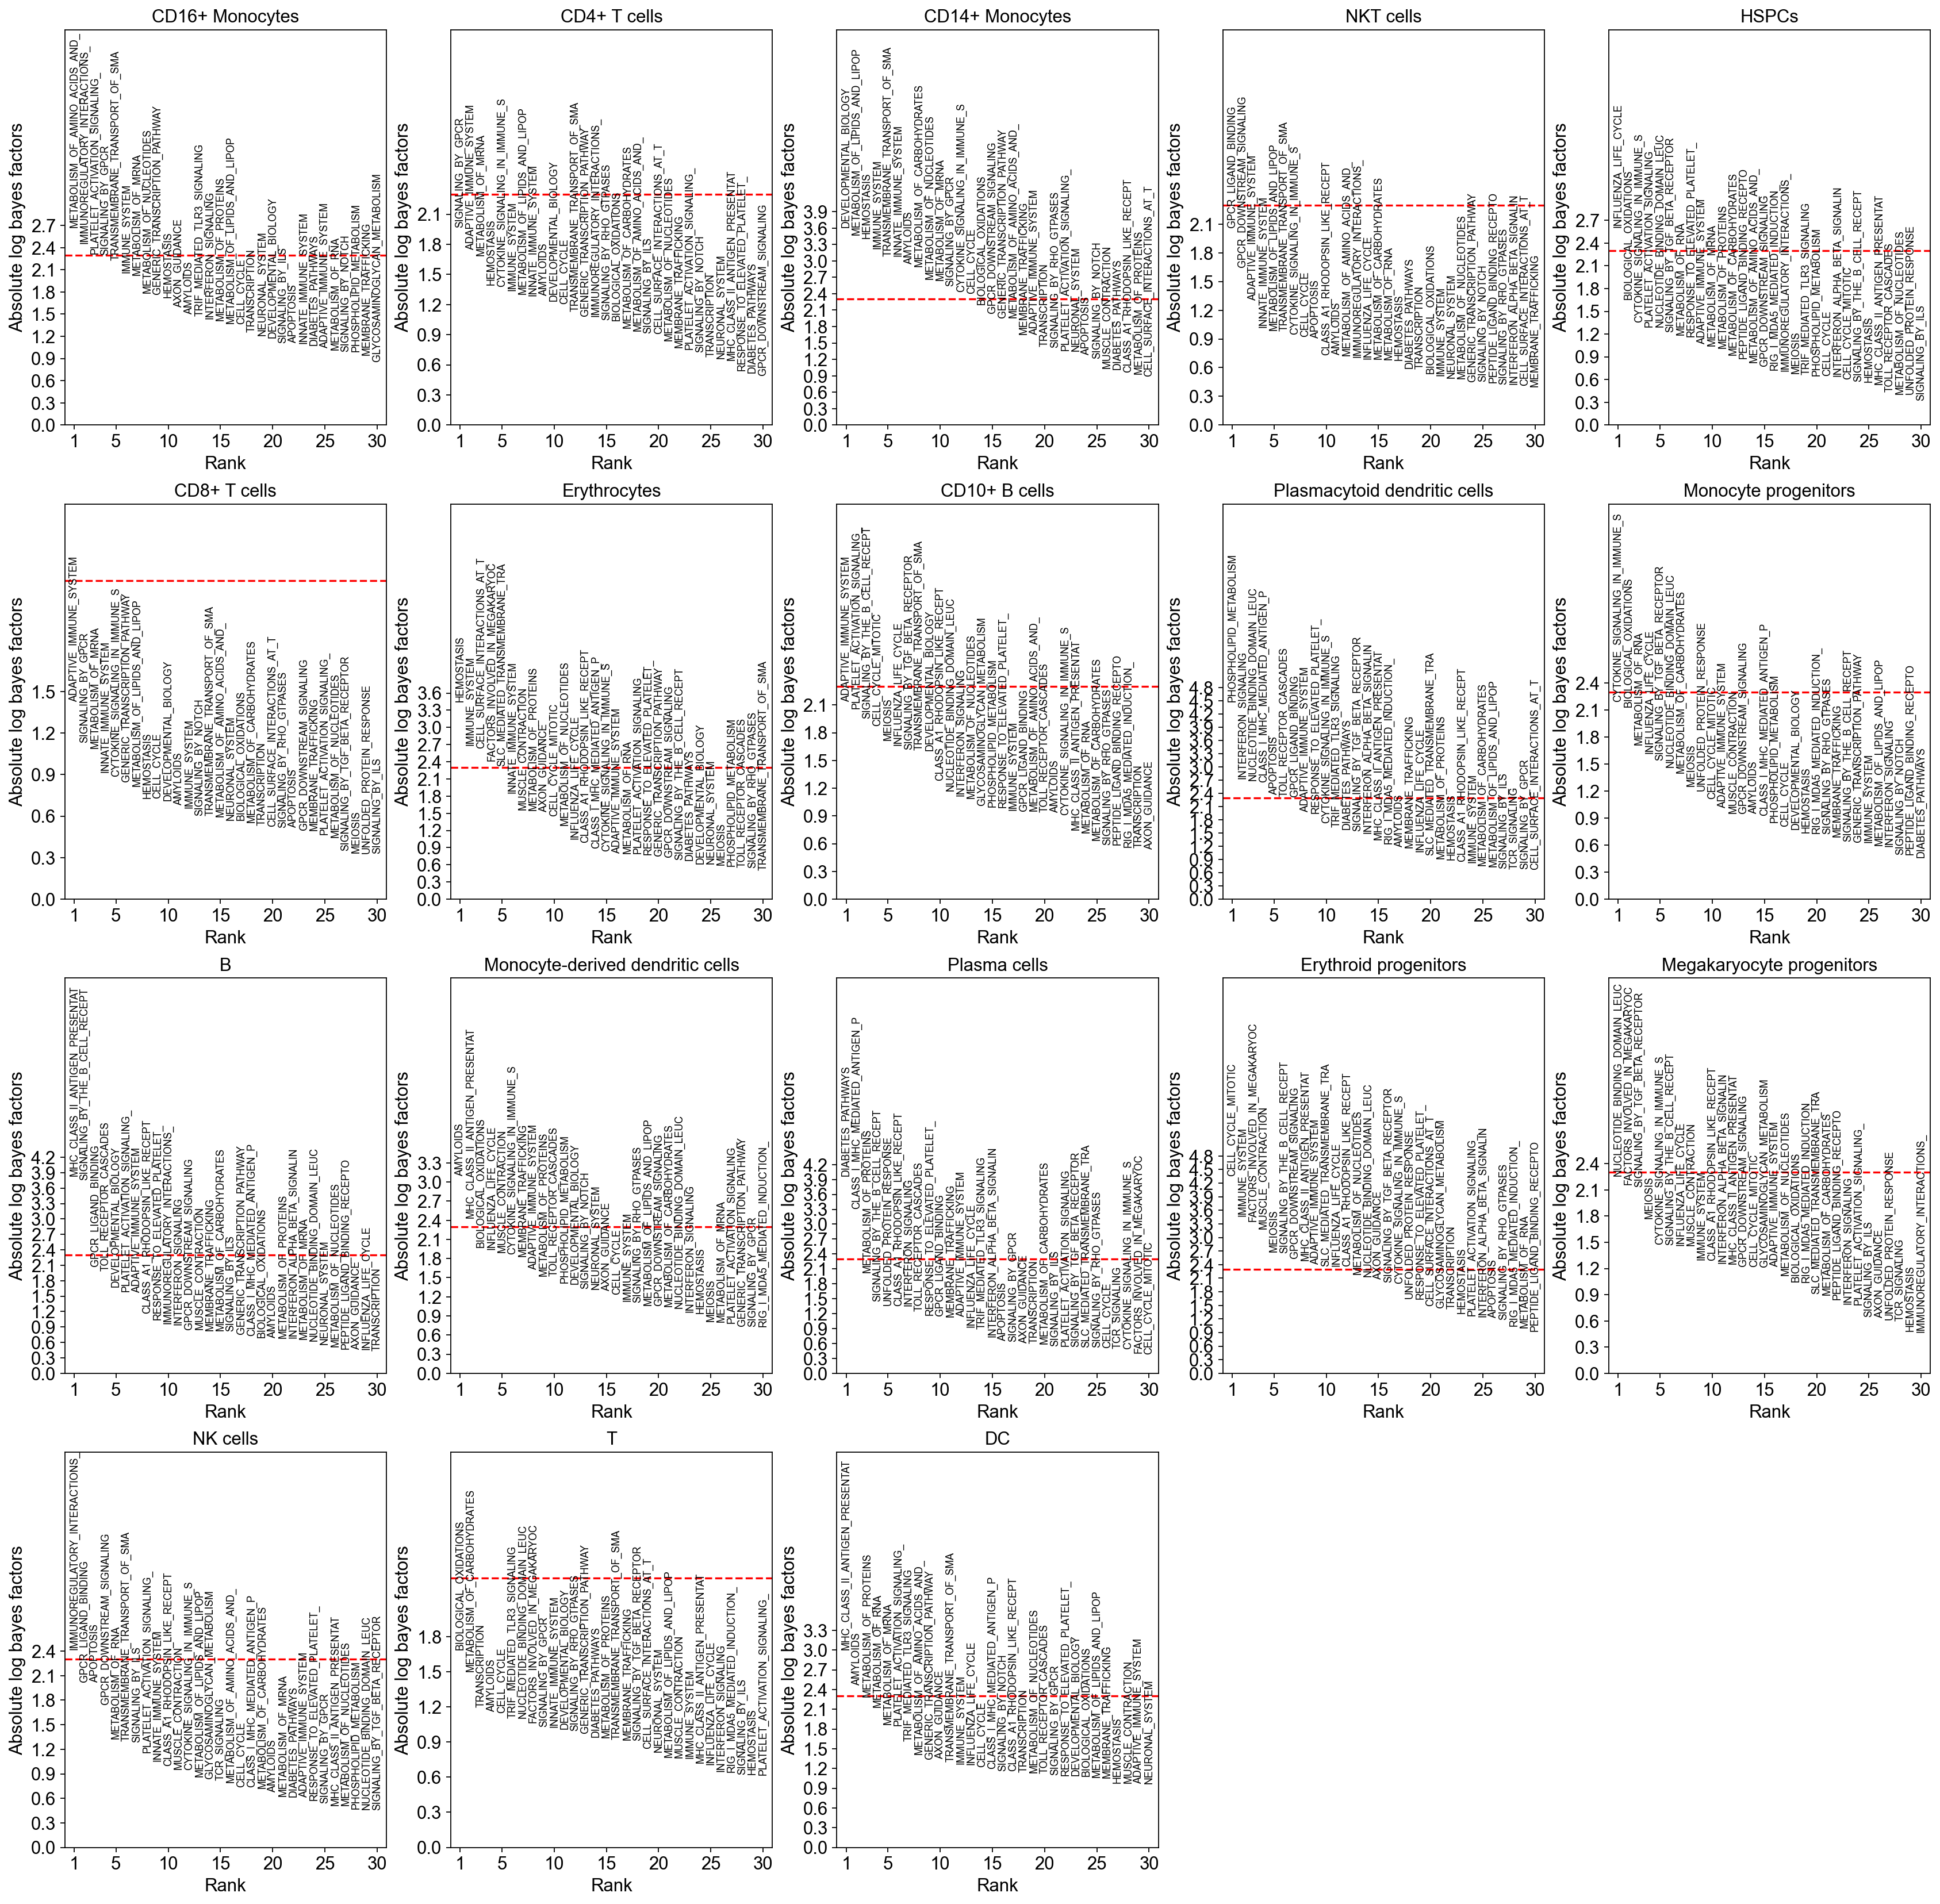

In [13]:
fig

In [15]:
# get genes' names for terms
intr_cvae.terms_genes()['APOPTOTIC_CLEAVAGE_OF_CELLULAR']

['LMNA',
 'CASP8',
 'SATB1',
 'CTNNB1',
 'PRKCD',
 'ADD1',
 'CASP3',
 'APC',
 'LMNB1',
 'PLEC',
 'TJP2',
 'GSN',
 'SPTAN1',
 'BIRC2',
 'VIM',
 'CASP7',
 'STK24',
 'ROCK1']